# Predicting departure flight delays from time series data
In this notebook, I attempt to help the players of the aviation industry by analysing historical flights data in the United States. According to [J.D. Power](http://www.jdpower.com/business/press-releases/jd-power-2017-north-america-airline-satisfaction-study), delays significantly affect satisfaction in both traditional and low-cost carriers' customers. One-quarter of all flights delayed by more than 15 minutes in 2007 in the United States. Delayed flights increase airline cost, indirectly affect labour productivity for business travellers, increase cost for leisure travellers, and generally change consumer spending in travel and tourism. According to [E. B. Peterson et al.](https://www.jstor.org/stable/24396355?seq=1#page_scan_tab_contents) US net welfare would increase by 17.6 billion USD for a 10% reduction in flight delay and by 38.5 billion USD for a 30% reduction.<br><br>
My intention is to present valuable insights and recommendations for airlines, airports and other businesses in the aviation industry that can help them reduce flight delays and related costs.

# 1. Challenge
The goal of the US Commercial Flight Challenge is to gain insights out of the datasets and perform predictions that could be valuable for the players of the airline industry. The Challenge provides two datasets including all commercial passenger flights in the US between 2002 and 2012 as well as weather data.<br><br>
Success criteria includes efficient transformation, integration of data, usage of well-performing Machine Learning algorithm and effective communication of findings.

# 2. Methodology
Main objective of any data science process is to turn data into insights and actions. Therefore, asking the right questions is crucial for a successful data science project. In this instance, opportunities and problems that need to be addressed will be explored in [Section 4.2](#4.2-Exploratory-Data-Analysis-(EDA)) as part of the Exploratory Data Analysis (EDA).<br>
Accordingly, the data science process starts with data aquisition and question formulation, then it continuous with building a process to come up with data driven insights.

![data_science_process.png](data_science_process.png)

As shown on the figure above from the book, [Doing Data Science](http://shop.oreilly.com/product/0636920028529.do), the data science process consists of 5 main steps: data aquisition, data preparation (exploration, cleaning, transformation), data analysis, reporting, and action. In this notebook, all stages are tackled besides data aquisition since the datasets were provided by the challenge. This process is highly iterative, hence many times I returned to data preparation stage to adjust settings such that they are suitable for visualization and prediction.
<br><br>
<b>Acknowledgement:</b> I was largely inspired by the [Kernel of FabienDaniel](https://www.kaggle.com/fabiendaniel/predicting-flight-delays-tutorial).

# 3. Data summary
This section gives an overview of the provided datasets. First, I loaded all the libraries that were necessary for this project. Second, I read the data files (flights.csv, weather.csv) that included the flight and weather data. I output summaries for both datasets that describe variables, number of rows, mean, min and max values. I also examined the variable types and the number of null values.

In [1]:
# Import libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from sklearn import preprocessing, metrics, linear_model, svm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import warnings
warnings.simplefilter("ignore")

In [2]:
# Read flights_medium.csv, examine dataframe shape, print dataframe summary
flights = pd.read_csv('data/flights_medium.csv', low_memory = False)
print('flights dataframe dimensions:', flights.shape)
flights.columns = map(str.lower, flights.columns) # make variable names lowercase
pd.DataFrame.describe(flights)

flights dataframe dimensions: (1000000, 19)


,airline_code,departure_actual,departure_delay,arrival_actual,arrival_delay,arrival_schedule,departure_schedule,dc_longitude,dc_latitude,longitude,latitude,path_order
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0
mean,20095.828243,1326.938284,7.368426,1477.357112,5.124772,1485.660543,1321.872749,-94.303253,36.893748,-94.303253,36.893748,1.0
std,353.375642,476.918211,29.396830,492.887577,32.412476,475.991411,465.118328,16.395112,5.072948,16.395112,5.072948,0.0
min,19386.000000,1.000000,-1167.000000,1.000000,-83.000000,1.000000,5.000000,-159.330000,17.700000,-159.330000,17.700000,1.0
25%,19790.000000,920.000000,-5.000000,1056.000000,-11.000000,1101.000000,917.000000,-107.210000,33.630000,-107.210000,33.630000,1.0
50%,20355.000000,1322.000000,-1.000000,1507.000000,-3.000000,1510.000000,1317.000000,-87.900000,36.890000,-87.900000,36.890000,1.0
75%,20374.000000,1725.000000,6.000000,1902.000000,9.000000,1859.000000,1715.000000,-81.300000,40.690000,-81.300000,40.690000,1.0
max,21171.000000,2400.000000,967.000000,2400.000000,1435.000000,2359.000000,2359.000000,-64.800000,61.170000,-64.800000,61.170000,1.0


In [3]:
# Output info on variable types and number of null values
info_flights = pd.DataFrame(flights.dtypes).T.rename(index = {0:'column type'})
info_flights = info_flights.append(pd.DataFrame(flights.isnull().sum()).T.rename(index={0:'null values (nb)'}))
info_flights = info_flights.append(pd.DataFrame(flights.isnull().sum()/flights.shape[0]*100).T.rename(index={0:'null values (%)'}))
info_flights

,date,airline,airline_code,arrival_airport,arrival_state,departure_airport,departure_state,departure_actual,departure_delay,arrival_actual,arrival_delay,arrival_schedule,departure_schedule,dc_longitude,dc_latitude,longitude,latitude,route,path_order
column type,object,object,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,object,int64
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Each row in flights_medium.csv corresponds to a single flight. There are 1,000,000 recorded flights described by 19 variables. Important variables are
- <b>date:</b> date of flight, e.g 2003-04-05
- <b>airline:</b> name of airline, e.g. EV
- <b>arrival_airport:</b> name of arrival airport, e.g. SHV
- <b>arrival_state:</b> name of arrival state, e.g. LA
- <b>departure_airport:</b> name of departure airport, e.g. MOB
- <b>departure_state:</b> name of departure state, e.g. AL
- <b>departure_delay:</b> difference in minutes between scheduled departure and actual departure, e.g. -10
- <b>arrival_delay:</b> difference in minutes between scheduled arrival and actual arrival, e.g. 30
- <b>arrival_schedule:</b> scheduled time of arrival, e.g. 2018
- <b>departure_schedule:</b> scheduled time of departure, e.g. 1830

In [4]:
# Read weather.csv, examine dataframe shape, print dataframe summary
weather = pd.read_csv('data/weather.csv', low_memory = False)
print('weather dataframe dimensions:', weather.shape)
weather.columns = map(str.lower, weather.columns) # make variable names lowercase
pd.DataFrame.describe(weather)

weather dataframe dimensions: (35488695, 6)


,time,temperature,snow,wind
count,3.548870e+07,3.548870e+07,1.031287e+07,3.548156e+07
mean,1.414393e+03,6.041955e+01,2.329395e-01,6.342785e+00
std,4.956853e+02,1.773203e+01,1.278321e+00,4.168315e+00
min,1.000000e+00,-4.600000e+01,0.000000e+00,0.000000e+00
25%,1.022000e+03,4.900000e+01,0.000000e+00,3.100000e+00
50%,1.424000e+03,6.200000e+01,0.000000e+00,5.600000e+00
75%,1.823000e+03,7.400000e+01,0.000000e+00,8.900000e+00
max,2.400000e+03,3.580000e+02,7.600000e+01,3.860000e+01


In [5]:
# Output info on variable types and number of null values
info_weather = pd.DataFrame(weather.dtypes).T.rename(index = {0:'column type'})
info_weather = info_weather.append(pd.DataFrame(weather.isnull().sum()).T.rename(index={0:'null values (nb)'}))
info_weather = info_weather.append(pd.DataFrame(weather.isnull().sum()/weather.shape[0]*100).T.rename(index={0:'null values (%)'}))
info_weather

,date,airport,time,temperature,snow,wind
column type,object,object,int64,int64,float64,float64
null values (nb),0,0,0,0,25175825,7139
null values (%),0,0,0,0,70.9404,0.0201163


Each row in weather.csv describes the weather at a given time and airport. There are 35,488,695 records in the weather dataframe described by the following 6 variables.
- <b>date:</b> e.g. 2006-03-14
- <b>airport:</b> name of airport, e.g. ORD
- <b>time:</b> e.g. 2041
- <b>temperature:</b> temperature in Fahrenheit, e.g. 35
- <b>snow:</b> measure of snowfall in centimeter, e.g. 3
- <b>wind:</b> measure of wind speed in metres per second, e.g. 18.6

# 4. Data preparation
As part of the data preparation, I recoded date and time variables into datetime and datetime.time types consequently, merged the flights and weather dataframes into one unified dataframe, removed unnecessary variables and rows with missing values. Next, I explored the cleaned data by visualising trends and correlations. 

## 4.1 Data preprocessing
In this section, I cleaned and transformed the dataset such that it is suitable for analysis.<br><br>
First, I recoded dates in both dataframes into datetime format.

In [6]:
# Convert date to datetime format
flights['date'] = pd.to_datetime(flights['date'])
weather['date'] = pd.to_datetime(weather['date'])

Similarly, I recoded *departure_actual, departure_schedule, arrival_actual and arrival_schedule* variables in the flights dataframe from integer into datetime.time format. I did the same to the *time* variable in the weather dataframe.

In [7]:
# Function that converts the 'HHMM' integer to datetime.time
def format_time(time):
    if time == 2400: 
        time = 0
    time = "{0:04d}".format(int(time))
    trans_time = datetime.time(int(time[0:2]), int(time[2:4]))
    return trans_time

In [8]:
# Convert time to datetime.time format
flights['departure_actual'] = flights['departure_actual'].apply(format_time)
flights['arrival_actual'] = flights['arrival_actual'].apply(format_time)
flights['arrival_schedule'] = flights['arrival_schedule'].apply(format_time)
flights['departure_schedule'] = flights['departure_schedule'].apply(format_time)

weather['time'] = weather['time'].apply(format_time)

flights.loc[:5, ['date', 'departure_actual', 'arrival_actual', 'arrival_schedule', 'departure_schedule']]

,date,departure_actual,arrival_actual,arrival_schedule,departure_schedule
0,2009-04-24,16:46:00,18:54:00,18:59:00,16:50:00
1,2009-04-29,16:40:00,18:34:00,18:59:00,16:50:00
2,2010-04-30,10:41:00,12:47:00,13:10:00,10:45:00
3,2010-04-15,10:55:00,13:10:00,13:10:00,10:45:00
4,2010-12-24,10:09:00,12:01:00,12:42:00,10:15:00
5,2010-04-27,10:31:00,12:37:00,13:10:00,10:45:00


I combined the flights and weather dataframes into one unified dataframe that includes weather data for both arrival and departure times and airports. Furthermore, I dropped unnecessary variables including *departure_actual* and *arrival_actual* times. Both departure_actual and arrival_actual can be calculated from schedule and delay variables therefore I declared them unnecessary for analysis.

In [9]:
# Merge weather and flights dataframes to include departure weather
df1 = flights.merge(weather, how = 'inner', left_on = ['date','departure_airport','departure_schedule'], right_on = ['date','airport','time'])
df1.rename(columns = {'temperature': 'departure_temp', 'snow': 'departure_snow', 'wind': 'departure_wind'}, inplace = True)

# Drop unnecessary columns
variables_to_remove = ['airline_code', 'departure_actual', 'arrival_actual', 'dc_longitude', 'dc_latitude', 
                       'longitude','latitude','route','path_order', 'airport', 'time']
df1.drop(variables_to_remove, axis = 1, inplace = True)

In [10]:
# Merge df1 and weather dataframes to include arrival weather
df = df1.merge(weather, how = 'inner', left_on = ['date','arrival_airport','arrival_schedule'], right_on = ['date','airport','time'])
df.rename(columns = {'temperature': 'arrival_temp', 'snow': 'arrival_snow', 'wind': 'arrival_wind'}, inplace = True)

# Drop unnecessary columns
variables_to_remove = ['airport', 'time']
df.drop(variables_to_remove, axis = 1, inplace = True)

df = df[['date', 'airline', 'arrival_airport', 'arrival_state', 'departure_airport', 'departure_state', 
        'arrival_delay', 'departure_delay', 'arrival_schedule', 'departure_schedule', 'arrival_temp',
        'arrival_snow', 'arrival_wind', 'departure_temp', 'departure_snow', 'departure_wind']]
df[:5]

,date,airline,arrival_airport,arrival_state,departure_airport,departure_state,arrival_delay,departure_delay,arrival_schedule,departure_schedule,arrival_temp,arrival_snow,arrival_wind,departure_temp,departure_snow,departure_wind
0,2007-03-30,9E,SAV,GA,DTW,MI,19,-2,22:55:00,21:00:00,62,NaN,6.7,50,NaN,5.4
1,2007-03-30,9E,SAV,GA,DTW,MI,19,-2,22:55:00,21:00:00,62,NaN,6.7,50,NaN,5.4
2,2007-04-21,9E,SAV,GA,DTW,MI,8,1,22:56:00,21:01:00,60,NaN,1.5,58,NaN,3.5
3,2007-04-21,9E,SAV,GA,DTW,MI,8,1,22:56:00,21:01:00,60,NaN,1.5,58,NaN,3.5
4,2007-06-26,9E,SAV,GA,DTW,MI,-7,-4,11:21:00,09:13:00,81,NaN,5.0,81,NaN,5.8


Finally, I examined the number of <b>missing values</b> and the <b>filling factor</b> of each variable in the final dataframe.

In [11]:
# Examine missing values in the dataset
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,departure_snow,151858,27.062881
1,arrival_snow,115302,44.620661
2,departure_wind,10,99.995197
3,arrival_wind,3,99.998559
4,date,0,100.000000
5,airline,0,100.000000
6,arrival_airport,0,100.000000
7,arrival_state,0,100.000000
8,departure_airport,0,100.000000
9,departure_state,0,100.000000


Filling factor of *departure_snow and arrival_snow* is quite low, 27% and 45% consequently, all other variables have > 99% filling factors. Both *departure_snow and arrival_snow* seem like important variables in predicting flight delays therefore I decided to include these variables and drop all rows with missing values.

In [12]:
# Drop rows with missing values
df.dropna(inplace = True)
df.shape

(31789, 16)

As a result, the size of the dataset was significantly reduced. However, the dataset is still suitable for analysis, as well as for building prediction models.

## 4.2 Exploratory Data Analysis (EDA)
The aim of this section is to get a sense of the data by visualising correlations and trends. The following questions will be explored in order to gain valuable insights from the data.
- What is the annual trend in flight delay?
- What is the monthly trend in flight delay?
- What is the daily trend in flight delay?
- What is the variability of delay across airports?
- How does delay relate to the number of flights in airports?
- What is the variability of delay across airlines?
- How does delay relate to the duration of flights?
- How do departure and arrival delay relate to each other?
- What is the variability of wind across airports?
- How does wind impact delay?

### What is the annual trend in flight delay?

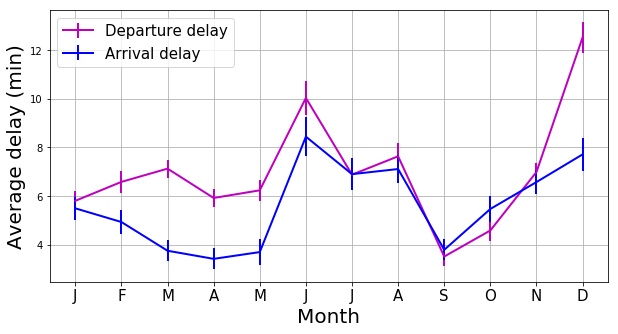

In [13]:
# Compute mean delays and standard error of the mean (sem) for each month
dft = df[['date','departure_delay', 'arrival_delay']]
dfgb = dft.groupby(dft['date'].dt.month)
df_mean_by_month = dfgb.agg(['mean','sem'])

# Define figure size
plt.figure(figsize=(10,5))
# Assign variables to values
departure_means = df_mean_by_month['departure_delay']['mean'].values
departure_sems = df_mean_by_month['departure_delay']['sem'].values
arrival_means = df_mean_by_month['arrival_delay']['mean'].values
arrival_sems = df_mean_by_month['arrival_delay']['sem'].values
# Plot variables
plt.errorbar(np.arange(1,13), departure_means, yerr = departure_sems, linewidth = 2, color = 'm', label = "Departure delay")
plt.errorbar(np.arange(1,13), arrival_means, yerr = arrival_sems, linewidth = 2, color = 'b', label = "Arrival delay")

# Design plot labels and legend
plt.ylabel('Average delay (min)', size = 20)
plt.xticks(np.arange(1,13), ['J','F','M','A','M','J','J','A','S','O','N','D'], size = 15)
plt.legend(loc = 'best', fontsize = 15, frameon = True)
plt.xlabel('Month', size = 20)

# Add grid
ax = plt.gca()
ax.grid(True)

The figure shows the annual trends in average flight delay, shown separately for departure delay and arrival delay. Both departure delay and arrival delay followed similar pattern throughout the years. Notice the <b>increase in flight delay in the summer months (June, July, August) and around the holidays (December)</b>. In this figure and all subsequent figures, error bars represent standard error of the mean (SEM).

### What is the monthly trend in flight delay?

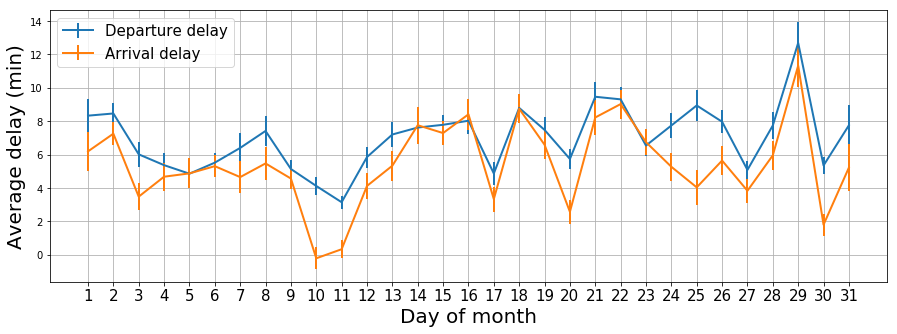

In [14]:
# Compute mean delays and standard error of the mean (sem) for each day in month
dft = df[['date','departure_delay', 'arrival_delay']]
dfgb = dft.groupby(dft['date'].dt.day)
df_mean_by_day = dfgb.agg(['mean','sem'])

# Define figure size
plt.figure(figsize=(15,5))
# Assign variables to values
departure_means = df_mean_by_day['departure_delay']['mean'].values
departure_sems = df_mean_by_day['departure_delay']['sem'].values
arrival_means = df_mean_by_day['arrival_delay']['mean'].values
arrival_sems = df_mean_by_day['arrival_delay']['sem'].values
# Plot variables
plt.errorbar(np.arange(1,32), departure_means, yerr = departure_sems, linewidth = 2, label = "Departure delay")
plt.errorbar(np.arange(1,32), arrival_means, yerr = arrival_sems, linewidth = 2, label = "Arrival delay")

# Design plot labels and legend
plt.ylabel('Average delay (min)', size = 20)
plt.xticks(np.arange(1,32), size = 15)
plt.legend(loc = 'best', fontsize = 15, frameon = True)
plt.xlabel('Day of month', size = 20)

# Add grid
ax = plt.gca()
ax.grid(True)

This figure shows the monthly trend in average flight delay, shown separately for departure delay and arrival delay. Notice that arrival delay is usually lower than departure delay, indicating that flights tend to corrigate the delay by increasing flight speed. Delay is usually lower around the 10th of the month and higher on the 29th.

### What is the daily trend in flight delay?

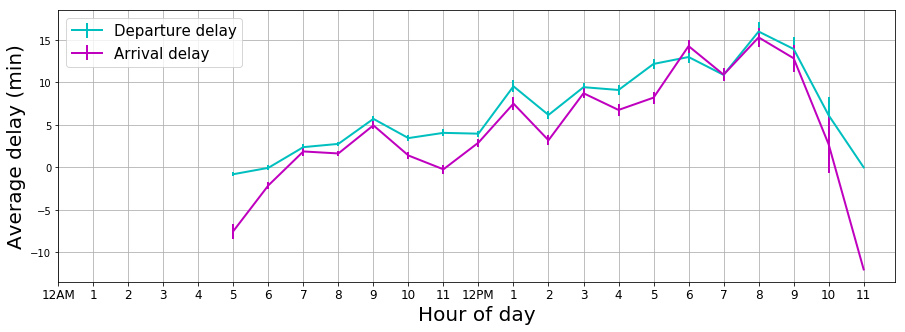

In [17]:
# Compute mean delays and standard error of the mean (sem) for each hour in day
dft = df[['departure_schedule', 'departure_delay', 'arrival_delay']]
dft[['h','m','s']] = dft.loc[:,'departure_schedule'].astype(str).str.split(':', expand=True).astype(int)
dfgb = dft.groupby(dft['h'])
df_mean_by_hour = dfgb.agg(['mean','sem'])
hs = df_mean_by_hour.index.values

# Define figure size
plt.figure(figsize=(15,5))
# Assign variables to values
departure_means = df_mean_by_hour['departure_delay']['mean'].values
departure_sems = df_mean_by_hour['departure_delay']['sem'].values
arrival_means = df_mean_by_hour['arrival_delay']['mean'].values
arrival_sems = df_mean_by_hour['arrival_delay']['sem'].values
# Plot variables
plt.errorbar(hs, departure_means, yerr = departure_sems, linewidth = 2, color = 'c', label = "Departure delay")
plt.errorbar(hs, arrival_means, yerr = arrival_sems, linewidth = 2, color = 'm', label = "Arrival delay")

# Design plot labels and legend
plt.ylabel('Average delay (min)', size = 20)
plt.xticks(np.arange(24),['12AM', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, '12PM', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], size = 12)
plt.legend(loc = 'best', fontsize = 15, frameon = True)
plt.xlabel('Hour of day', size = 20)
# Add grid
ax = plt.gca()
ax.grid(True)

This figure show the daily trend of average flight delay, shown separately for departure delay and arrival delay. Note, that delay gradually increses throughout the day and reaches a peak around 8pm where the delay is the highest. Average <b>delay is the lowest in the late night and early morning hours</b>. Departure delay and arrival delay follow similar pattern.<br>
According to this figure, the dataframe does not include flights between 11pm and 5am.

### What is the variability of delay across airports?

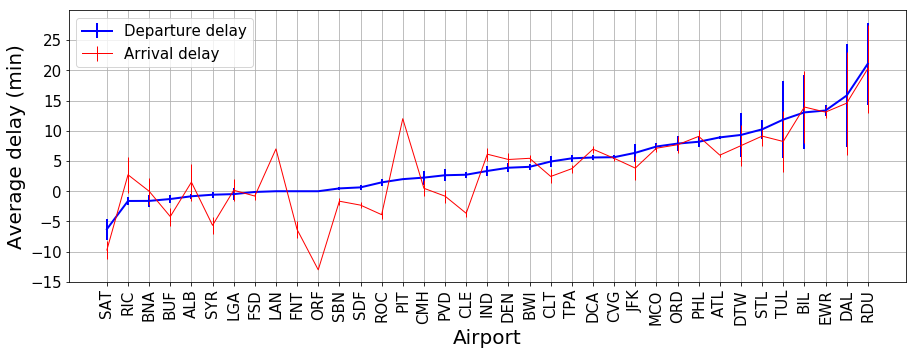

In [21]:
# Compute mean delays and standard error of the mean (sem) for each airport
dft = df[['departure_airport','departure_delay', 'arrival_delay']]
dfgb = dft.groupby('departure_airport')
df_mean_by_ap = dfgb.agg(['mean','sem','count'])

# Sort airports by departure mean delay
departure_sort_idx = np.argsort(df_mean_by_ap['departure_delay']['mean'].values)
departure_aps_means = df_mean_by_ap['departure_delay']['mean'].values[departure_sort_idx]
departure_aps_sems = df_mean_by_ap['departure_delay']['sem'].values[departure_sort_idx]

arrival_aps_means = df_mean_by_ap['arrival_delay']['mean'].values[departure_sort_idx]
arrival_aps_sems = df_mean_by_ap['arrival_delay']['sem'].values[departure_sort_idx]

aps = np.array(list(df_mean_by_ap.index))[departure_sort_idx]

# Plot 37 airports (there are 37 airports in the dataframe)
# Set figure size
plt.figure(figsize=(15,5))

# Plot errorbars
plt.errorbar(np.arange(37),departure_aps_means[:37],yerr=departure_aps_sems[:37],linewidth=2,color='b',label = "Departure delay")
plt.errorbar(np.arange(37),arrival_aps_means[:37],yerr=arrival_aps_sems[:37],linewidth=1,color='r',label = "Arrival delay")
# Design plot
plt.ylabel('Average delay (min)', size=20)
plt.xlabel('Airport',size=20)
plt.yticks(size=15)
plt.xticks(np.arange(37),aps[:37],size=15,rotation='vertical')
plt.legend(loc = 'best', fontsize = 15, frameon = True)
# Add grid
ax = plt.gca()
ax.grid(True)

This figure shows the average delay for each distinct departure airport, shown separately for departure and arrival delay. Arrival delay is the delay of the flight when arriving to the destination airport from the departure airport. Departure delay and arrival delay are similar for all airports excepts Norfolk International Airport (ORF) and Pittsburgh International Airport (PIT) where departure and arrival delay siginificantly differ from each other. This means that <b>departure airports have effect not only on the departure but on the arrival delay as well</b>. Note, that San Antonio International Airport (SAT) has the lowest average departure delay and Norfolk International Airport (ORF) has the lowest average arrival delay. Raleigh–Durham International Airport (RDU) has the highest average departure and arrival delay as well.

### How does delay relate to the number of flights in airports?

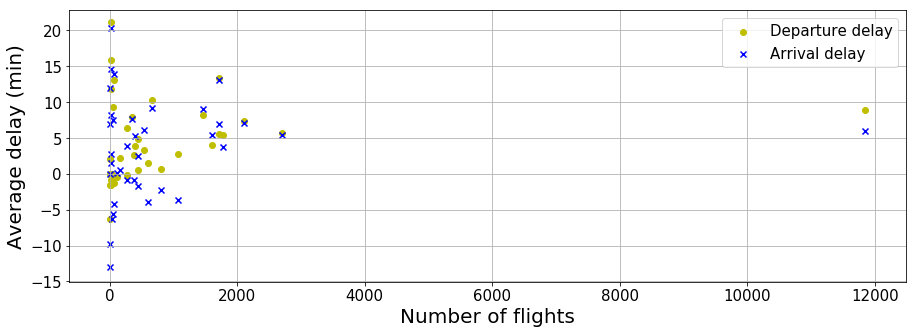

In [35]:
# Set figure size
plt.figure(figsize=(15,5))
# Plot number of flights against mean delay
plt.scatter(df_mean_by_ap['departure_delay']['count'].values, df_mean_by_ap['departure_delay']['mean'].values,marker='o',color='y',label='Departure delay')
plt.scatter(df_mean_by_ap['arrival_delay']['count'].values, df_mean_by_ap['arrival_delay']['mean'].values,marker='x',color='b',label='Arrival delay')
# Design plot
plt.ylabel('Average delay (min)', size=20)
plt.xlabel('Number of flights',size=20)
plt.yticks(size=15)
plt.xticks(size=15)
plt.legend(loc = 'best', fontsize = 15, frameon = True)
# Add grid
ax = plt.gca()
ax.grid(True)

This figure shows the average delay for each airport. The number of flights departing from the airport is shown on the x axis. Arrival delay and departure delay are shown separately. Notice, that <b>higher number of departing flights in airports come with higher average departure and arrival delay</b>.<br><br>
The majority of flights correspond to a single airport, this may cause imbalance in the data that affects the performance of modelling.

### What is the variability of delays across airlines?

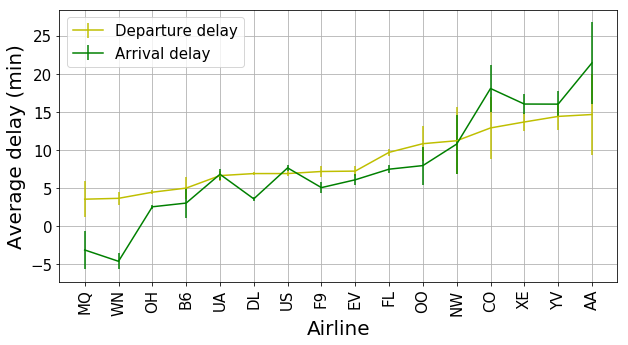

In [39]:
# Find average delay by airline
dft = df[['airline','departure_delay','arrival_delay']]
dfgb = dft.groupby('airline')
df_mean_by_al = dfgb.agg(['mean','sem','count'])

# Get airlines sorted by mean departure delay
departure_sort_idx = np.argsort(df_mean_by_al['departure_delay']['mean'].values)
departure_als_means = df_mean_by_al['departure_delay']['mean'].values[departure_sort_idx]
departure_als_sems = df_mean_by_al['departure_delay']['sem'].values[departure_sort_idx]

arrival_als_means = df_mean_by_al['arrival_delay']['mean'].values[departure_sort_idx]
arrival_als_sems = df_mean_by_al['arrival_delay']['sem'].values[departure_sort_idx]

als = np.array(list(df_mean_by_al.index))[departure_sort_idx]

# Plot flight delay by airline
N = len(als)
plt.figure(figsize=(10,5))  
plt.errorbar(np.arange(N),departure_als_means,yerr=departure_als_sems,color='y',label='Departure delay')
plt.errorbar(np.arange(N),arrival_als_means,yerr=arrival_als_sems,color='g',label='Arrival delay')
plt.ylabel('Average delay (min)', size=20)
plt.xlabel('Airline',size=20)
plt.yticks(size=15)
plt.xticks(np.arange(N),als,size=15,rotation='vertical')
plt.legend(loc='best',fontsize=15,frameon=True)
# Add grid
ax = plt.gca()
ax.grid(True)

This figure shows the average departure and arrival delay for each airline included in the dataset. Note, that <b>airlines that have low departure delays tend to have low arrival delay and vica versa</b>. Envoy Air (MQ) has the lowest average departure and arrival delay, while American Airlines (AA) has the highest average departure and arrival delay.

### How delays relate to the duration of flights?

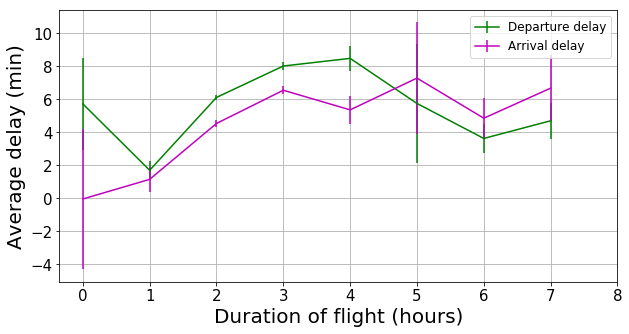

In [41]:
# Compute duration of flights and average delay for each distinct duration
dft = df[['departure_schedule', 'arrival_schedule', 'departure_delay', 'arrival_delay']]
dft[['dep_h','dep_m','dep_s']] = dft.loc[:,'departure_schedule'].astype(str).str.split(':', expand=True).astype(int)
dft[['arr_h','arr_m','arr_s']] = dft.loc[:,'arrival_schedule'].astype(str).str.split(':', expand=True).astype(int)
dft['duration'] = dft['arr_h'] - dft['dep_h']
dfgb = dft.groupby(dft['duration'])
mean_delays = dfgb.agg(['mean','sem'])

x = np.arange(8)
# Extract values from dataframe
dep = mean_delays['departure_delay']['mean'].values
arr = mean_delays['arrival_delay']['mean'].values
# Set figure size
plt.figure(figsize=(10,5))
# Plot mean delays for each flight duration in hours
plt.errorbar(x, dep,yerr=mean_delays['departure_delay']['sem'].values,color='g',label='Departure delay')
plt.errorbar(x, arr,yerr=mean_delays['arrival_delay']['sem'].values,color='m',label='Arrival delay')
# Design plot
plt.xlabel('Duration of flight (hours)',size=20)
plt.ylabel('Average delay (min)', size=20)
plt.yticks(size=15)
plt.xticks(np.arange(9),size=15)
plt.legend(loc='best',fontsize=12,frameon=True)
# Add grid
ax = plt.gca()
ax.grid(True)

This plot shows the average delay for each duartion of flight in hours. Notice, that <b>departure delay tend to be higher for shorter flights (0-4 hours), while arrival delay tend to be higher for longer flights (5-8 hours)</b>.

### How do departure and arrival delays relate to each other?

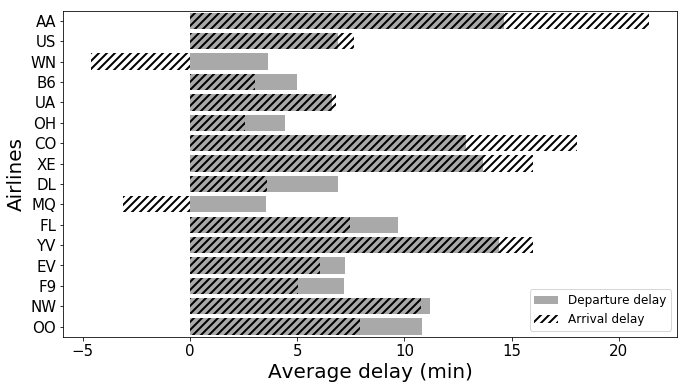

In [53]:
# Set hatch parameter
mpl.rcParams['hatch.linewidth'] = 2.0 # style of hatch lines
# Set figure size
fig = plt.figure(figsize = (11,6))
# Plot departure and arrival delays per airline
ax = sns.barplot(x = "departure_delay", y = "airline", data = df, color = "darkgray", ci = None, label = 'Departure delay')
ax = sns.barplot(x = "arrival_delay", y = "airline", data = df, color = "r", hatch = '///', alpha = 0.0, ci = None, label = 'Arrival delay')
# Design plot
plt.xlabel('Average delay (min)', fontsize=20)
plt.ylabel('Airlines', size=20)
plt.yticks(size=15)
plt.xticks(size=15)
plt.legend(loc='best',fontsize=12,frameon=True)

This figure shows the average delay in minutes for each airline, shown separately for departure delay and arrival delay. This plot visualises the same data as figure corresponding to the ['What is the variability of delays across airlines?'](#What-is-the-variability-of-delays-across-airlines?) section however ephasises more the difference between the average departure and arrival delay. Note, that American Airlines (AA), Continental Airlines (CO), JetSuite Air (XE), Mesa Airlines (YV) tend to have higher arrival delay than departure delay. Southwest Airlines (WN) and Envoy Air (MQ) tend to have lower arrival delay than departure delay.<br><br>
<b>Delays at arrival are generally lower than at departure</b>. This indicates that airlines adjust their flight speed in order to reduce the delays at arrival.

### What is the variability of wind across airports?

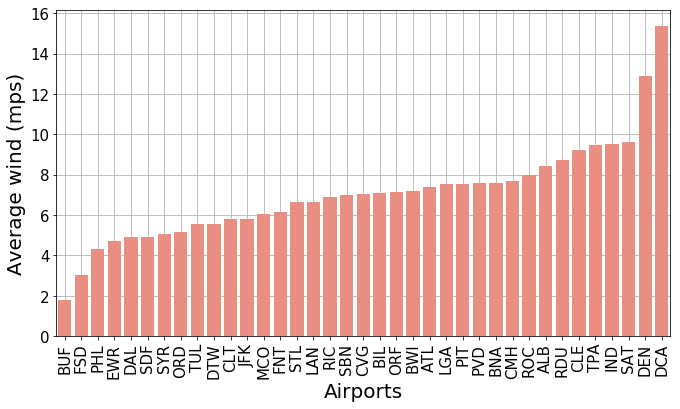

In [43]:
# Compute average wind for each airport
dft = df[['departure_airport', 'departure_wind']]
dfgb = dft.groupby(dft['departure_airport'])
mean_wind = dfgb.agg(['mean','sem'])

# Sort airports by wind values
wind_sort_idx = np.argsort(mean_wind['departure_wind']['mean'].values)

# Set figure size
fig = plt.figure(figsize = (11,6))
# Plot departure and arrival delays per airline
ax = sns.barplot(np.arange(37), mean_wind['departure_wind']['mean'].values[wind_sort_idx], data = df, color = "salmon", ci = None, zorder=3)
# Design plot
plt.xticks(np.arange(37),aps[wind_sort_idx],size=15,rotation='vertical')
plt.xlabel('Airports', fontsize=20)
plt.ylabel('Average wind (mps)', size=20)
plt.yticks(size=15)
plt.xticks(size=15)
# Add grid
ax = plt.gca()
ax.grid(True, zorder=0)

This figure shows the average wind for each airport in the dataset. DCA has the highest average wind, while BUF has the lowest average wind. Notice, that SAT, BNA, ALB has high average wind, however low average delay (refer to [What is the variability of delay across airports?](#What-is-the-variability-of-delay-across-airports?)). BUF has low average wind and low average delay. RDU has high average wind and high average delay. DAL has low average wind and high average delay. Generally, there is no clear trend between an airport havig high average delay and high average wind.

### How does wind impact delays?

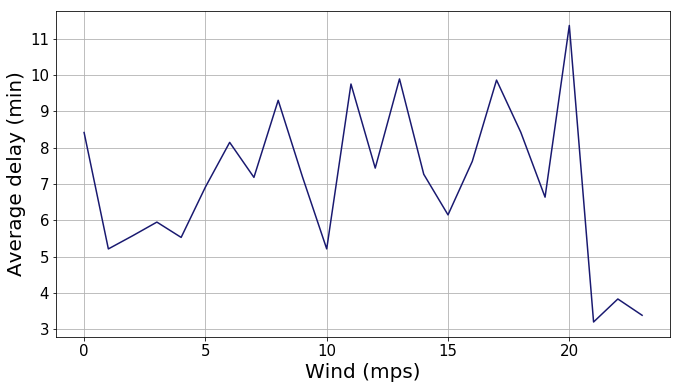

In [44]:
# Compute average departure delay for each wind value
dft = df[['departure_delay', 'departure_wind']]
dft['departure_wind'] = dft['departure_wind'].astype(int)
dfgb = dft.groupby(dft['departure_wind'])
mean_delay = dfgb.agg(['mean'])
wind = mean_delay.index.values

# Set figure size
plt.figure(figsize=(11,6))
# Plot mean delays for each flight duration in hours
plt.plot(wind,mean_delay['departure_delay']['mean'].values,color = 'midnightblue')
# Design plot
plt.xlabel('Wind (mps)',size=20)
plt.ylabel('Average delay (min)', size=20)
plt.yticks(size=15)
plt.xticks(size=15)
# Add grid
ax = plt.gca()
ax.grid(True)

This plot shows the average departure delay for each wind value. Generally, higher wind values correspond to higher departure delays, however there is no clear connection between the two variables.

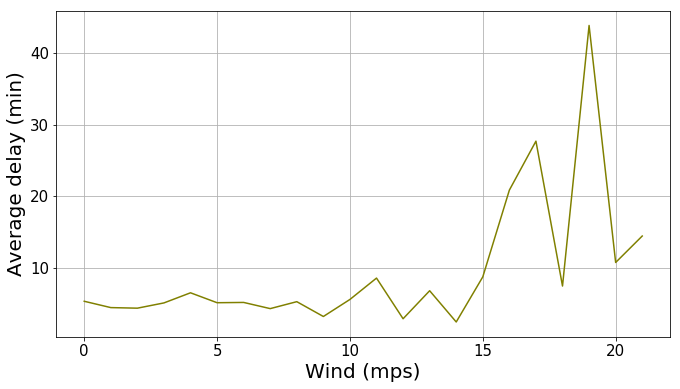

In [45]:
# Compute average arrival delay for each wind value
dft = df[['arrival_delay', 'arrival_wind']]
dft['arrival_wind'] = dft['arrival_wind'].astype(int)
dfgb = dft.groupby(dft['arrival_wind'])
mean_delay = dfgb.agg(['mean'])
wind = mean_delay.index.values

# Set figure size
plt.figure(figsize=(11,6))
# Plot mean delays for each flight duration in hours
plt.plot(wind,mean_delay['arrival_delay']['mean'].values, color = 'olive')
# Design plot
plt.xlabel('Wind (mps)',size=20)
plt.ylabel('Average delay (min)', size=20)
plt.yticks(size=15)
plt.xticks(size=15)
# Add grid
ax = plt.gca()
ax.grid(True)

This figure shows the average arrival delay for each wind value. There is a clear trend between wind and average delay where <b>higher wind values come with higher average arrival delays</b>. Therefore, wind could be a good predictor of arrival delays.

# 5. Prediction

## 5.1 Modelling
In this section, I built <b>4 different Machine Learning models</b> to predict the departure delay of flights. I used 4 algorithms from the sklearn library, Linear Regression, Ridge Regression, Support Vector Machine and Multi-layer Perceptron. Due to the short time available, I applied <b>random search for hyperparameter optimisation</b>. Several hyperparameter settings were investigated for each model, only the best performing settings are included in this notebook. 

### Data transformation
I transformed the data such that it is suitable for prediction models. Variables of type datetime were transformed into ordinal and integer values. Categorical variables were decoded into dummy variebles using One Hot Encoding. Finally, uneccessary columns were dropped from the dataframe.

In [46]:
# Decode datetime.time variables to hours, minutes, seconds
df[['dep_h','dep_m','dep_s']] = df['departure_schedule'].astype(str).str.split(':', expand=True).astype(int)
df[['arr_h','arr_m','arr_s']] = df['arrival_schedule'].astype(str).str.split(':', expand=True).astype(int)

In [47]:
# Decode categorical variables with one hot encoder
cols_to_transform = df[['airline','departure_airport','arrival_airport']]
df_with_dummies = pd.get_dummies(cols_to_transform)

In [48]:
# Join decoded colums to dataframe df
df = df.join(df_with_dummies)

In [49]:
# Delete unnecessary colums from df
df = df.drop(['airline','departure_airport','arrival_airport','arrival_state','departure_state','departure_schedule','arrival_schedule','arrival_delay','dep_m','dep_s','arr_m','arr_s'], axis = 1)

### Creating train and test splits
First, I examined the time scale of the data.

In [50]:
# Check earliest and latest dates
print('Earliest date:', min(df['date']))
print('Latest date:', max(df['date']))

Earliest date: 2005-01-01 00:00:00
Latest date: 2007-07-18 00:00:00


The earliest date found in the dataset is 2005-01-01, while the latest is 2007-07-18. I used flights before 2007-01-01 for training and flights later than 2007-01-01 for testing. Accordingly, the ratio of the train:test splits is 56:44.

In [51]:
# Create train and test data splits
df_train = df[df['date'].apply(lambda x:x.date()) < datetime.date(2007, 1, 1)]
df_test  = df[df['date'].apply(lambda x:x.date()) > datetime.date(2007, 1, 1)]
print(df_train.shape, df_test.shape)

(22031, 72) (9733, 72)


Occasionally, delays of several hours could be recorded. The cause of these extreme delays are probably due to unpredictable events. In order to prevent introducing bias into the analysis, I removed all rows from the dataframe that had delay value greater than 60 minutes.

In [52]:
# Drop rows with delay values > 60 minutes
df_train.drop(df_train[abs(df_train['departure_delay']) > 60].index, inplace = True)
df_test.drop(df_test[abs(df_test['departure_delay']) > 60].index, inplace = True)

Finally, I converted variable of type datetime into ordinal values.

In [53]:
# Convert date to ordinal value as linear regression cannot work with date
df_train['date'] = df_train['date'].map(datetime.datetime.toordinal)
df_test['date'] = df_test['date'].map(datetime.datetime.toordinal)

### Model building
First, I defined a function that I used for evaluating training models in addition to mean squared error.

In [54]:
Y = df_train['departure_delay']
X = df_train.drop(['departure_delay'], axis=1)

In [55]:
# Compute the number of predictions where the differences with real value is greater than 10 minutes
def evaluate(predictions, Y):
    icount = 0
    for i, val in enumerate(Y):
        if abs(val-predictions[i]) > 10: icount += 1
    return '{:.2f}%'.format(icount / len(predictions) * 100)

### Linear Regression
Liner Regression achieved <b>131.62 mean squared error</b> on the training set and was able to predict delay values with less than 10 minutes error for 79.36% of training instances.

In [56]:
# Build Linear Regression model
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = lr.predict(X)
# Print training performance
print("MSE =", metrics.mean_squared_error(predictions, Y))
print("# predictions with error > 10 mins =", evaluate(predictions, Y))

MSE = 131.61986741036674
# predictions with error > 10 mins = 20.64%


### Ridge Regression
Ridge Regression was investigated for alpha values 0.1, 1.0, 5.0, 10.0, normalize values True and False, as well as for Singular Value Decomposition and Stochastic Average Gradient (SAG) descent solvers. The best model normalizes X, has alpha value 0.1 and SAG solver. It achieved <b>131.75 mean squared error</b> on the training data.

In [57]:
# Build Ridge Regression model
rr = linear_model.Ridge(alpha=0.1, normalize = True, solver = 'sag', random_state=241)
model = rr.fit(X, Y)
predictions = rr.predict(X)
# Print training performance
print("MSE =", metrics.mean_squared_error(predictions, Y))
print("# predictions with error > 10 mins =", evaluate(predictions, Y))

MSE = 131.7545379514459
# predictions with error > 10 mins = 20.36%


### Support Vector Machine (SVM)
SVM outperformed both Linear Regression and Ridge Regression. It achieved <b>116.08 mean squared error</b> and was able to predict delay values with less than 10 minutes error for 86.24% of training instances.

In [58]:
# Build SVM model
svmr = svm.SVR()
model = svmr.fit(X, Y) 
predictions = svmr.predict(X)
# Print training performance
print("MSE =", metrics.mean_squared_error(predictions, Y))
print("# predictions with error > 10 mins =", evaluate(predictions, Y))

MSE = 116.07773317247538
# predictions with error > 10 mins = 13.76%


### Multi-layer Perceptron (MLP)
MLP is sensitive to feature scaling, therefore X was standardized to have 0 mean and 1 variance using StandardScaler. MLP was investigated for 1, 2, and 3 hidden layers, 10, 50, 100 hidden layer sizes, 0.0001, 0.001, 0.01 alpha values, adaptive and constant learning rates and 100, 200, 500 epochs. The best model achieved <b>25.06 mean squeared error<b> on the training set and was able to predict delay values with less than 10 minutes error for 95.79% of training instances.

In [59]:
# Prepare data for Multilayer Perceptron
scaler = StandardScaler()  
scaler.fit(X)
X_train = scaler.transform(X)

MSE = 25.062975062898026
# predictions with error > 10 mins = 4.21%


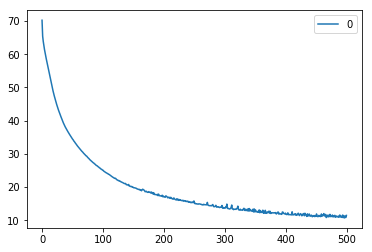

In [60]:
mlp = MLPRegressor(hidden_layer_sizes=(50,50,50), activation = 'relu', learning_rate = 'adaptive', 
                   early_stopping = True, alpha = 0.01, random_state = 1, max_iter = 1, warm_start = True)
for i in range(500):
    mlp.fit(X_train, Y)
pd.DataFrame(mlp.loss_curve_).plot()
predictions = mlp.predict(X_train)
# Print training performance
print("MSE =", metrics.mean_squared_error(predictions, Y))
print("# predictions with error > 10 mins =", evaluate(predictions, Y))

## 5.2 Evaluation
MLP and SVM proved to be the best models found. In order to get a sense of the performance of the models on unseen data, I evaluate the models on the test split.<br><br>
Similarly to the training set, I apply the standardization step on the test set.

In [61]:
Y_test = df_test['departure_delay']
X_test = df_test.drop(['departure_delay'], axis=1)

In [62]:
# Standardize test data
X_test = scaler.transform(X_test)

In [63]:
# Test MLP
predictions = mlp.predict(X_test)
# Print test performance
print("MSE =", metrics.mean_squared_error(predictions, Y_test))
print("# predictions with error > 10 mins =", evaluate(predictions, Y_test))

MSE = 710.1450655623842
# predictions with error > 10 mins = 54.77%


Unfortunately, MLP performed quite poorly on the test set with 710.15 mean squared error. <b>MLP probably overfitted the training data</b>, therefore unable to generalise to unseen data. These result highlights the importance of using validation.

In [64]:
# Test SVM
predictions = svmr.predict(X_test)
# Print test performance
print("MSE =", metrics.mean_squared_error(predictions, Y_test))
print("# predictions with error > 10 mins =", evaluate(predictions, Y_test))

MSE = 160.69241088648266
# predictions with error > 10 mins = 19.07%


SVM achieved 160.69 mean squared error on the test data and was able to predict delay values with less than 10 minutes error for 80.93% of test instances. SVM performs similarly on the test data as on the training data which refers to the ability of the model to <b>capture the characteristics of the underlying true function</b>.

# 6. Insights
Modelling the causes of flight delays is a complex and highly researched problem. In this project, I attempted to gain insights from flights and weather data through visualisation and prediction of delay. I came to the following key conclusions.
- Delays at arrival are generally lower than at departure.
- Delays are generally higher in the summer months (June, July, August) and around the holidays (December).
- Delays are generally lower in late night and early morning hours.
- Delays tend to be higher if the number of departing flights is higher at the departure airport.
- Airlines with low departure delays tend to have low arrival delays and vica versa.
- Departure delay tends to be higher for shorter flights (0-4 hours).
- Arrival delay tends to be higher for longer flights (5-8 hours).
- Arrival delays are generally higher when the wind is stronger.
- Departure delay can be predicted, however higher accuracy requires more sophisticated models.

# 7. Recommendations
In this section, I propose directions for potential applications based on the insights gained from this project.
- Indicating expected delay for flights may prevent disappointment of customers. This is a potential application for airlines and resellers that sell flight tickets online.
- Airports may use flight delay predictions to schedule flight taxiing, take-offs and landing, as well as to inform customers about expected delays beforehand.
- Customers are recommended to travel in spring and autumn months to minimise their expected delay.

## 7.1 Future work
This project was an exploratory research activity that has a lot of room for improvement. The following is a brief list of proposals for future work that will cover limitations and ways to improve.
- Due to removing rows with missing snow values, the size of the dataset shrunk. Bigger dataset may allow more accurate predictions.
- The cleaned dataset only included 37 airports that represent only a small part of the US airline industry. This may affect the justifiability of the results.
- Almost half of the flights described in the dataset correspond to a single airport which makes the dataset unbalanced.
- Only wind has been examined within EDA. Other weather variables could provide valuable insights as well.
- Predicting arrival delay could be easily done and would require minor changes to the code.
- Validation has not been used to evaluate training models which largely contributed to the poor test results.

#### I really enjoyed working on this project. Thank you for the opportunity! If you have any questions, feel free to contact me at alexa.abbas@gmail.com. Look forward to hearing from you! :)